# <font color='#FFE15D'>**Week 6: Color Space**</font> 🔴🟢🔵

## <span style="font-size: 0.9em;">🟥</span> **Import**


In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [62]:
cv2.__version__

'4.11.0'

## <span style="font-size: 0.9em;">🟥</span> **Section 0: Image Generation**

In [63]:
# Define the size of each square and the margin
square_size = 100
margin = 10

# Define the colors (in BGR format)
colors = [
    (0, 0, 255),      # Red
    (255, 0, 0),      # Blue
    (0, 255, 0),      # Green
    (0, 255, 255),    # Yellow
    (255, 255, 0),    # Cyan
    (255, 0, 255),    # Magenta
    (0, 0, 0),        # Black
    (128, 128, 128),  # Gray
    (255, 255, 255),  # White
    (0, 165, 255),    # Orange
    (0, 0, 128),      # Maroon
    (39, 57, 89),     # Brown
]

# Calculate the dimensions of the inner content
inner_height = 3 * square_size + 4 * margin
inner_width = 4 * square_size + 5 * margin

# Create an empty gray image
outer_margin = 0
image_height = inner_height + 2 * outer_margin
image_width = inner_width + 2 * outer_margin
image = np.ones((image_height, image_width, 3), dtype=np.uint8) * 30  # Gray background

# Draw the colored squares within the black rectangle
for i in range(4):
    for j in range(3):
        top_left = (outer_margin + margin + i * (square_size + margin), outer_margin + margin + j * (square_size + margin))
        bottom_right = (top_left[0] + square_size, top_left[1] + square_size)
        color_index = i * 3 + j
        cv2.rectangle(image, top_left, bottom_right, colors[color_index], -1)

# Save and display the image
cv2.imwrite('data/color_spaces.png', image)
cv2.imshow('Color Spaces', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## <span style="font-size: 0.9em;">🟥</span> **Section 1: Color Spaces**

### <span style="font-size: 0.9em;">🟧</span> **`cv2.cvtColor()`**

In [64]:
cv2.cvtColor?

Docstring:
cvtColor(src, code[, dst[, dstCn[, hint]]]) -> dst
.   @brief Converts an image from one color space to another.
.   
.   The function converts an input image from one color space to another. In case of a transformation
.   to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note
.   that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the
.   bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue
.   component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and
.   sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.
.   
.   The conventional ranges for R, G, and B channel values are:
.   -   0 to 255 for CV_8U images
.   -   0 to 65535 for CV_16U images
.   -   0 to 1 for CV_32F images
.   
.   In case of linear transformations, the range does not matter. But in case of a non-linear
.  

In [65]:
#cv2.COLOR_BGR2

#### Using Matplotlib to get RGB values (NOT IN JUPITER)

In [66]:
def show_using_matplotlib(rgb_image=None, bgr_image=None, name=None):
    import matplotlib.pyplot as plt

    if rgb_image is not None:
        pass
    elif bgr_image is not None:
        rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    else:
        raise Exception("Give an image as input")

    if not name:
        from datetime import datetime

        now = datetime.now()
        date_time = now.strftime("%m/%d/%Y, %H:%M:%S")
        name = date_time
    fig = plt.figure()
    plt.title(name)
    plt.imshow(rgb_image)
    plt.show()

In [67]:
img = cv2.imread("data/color_spaces.png")
img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC3)

cv2.imshow("Original Image", img)
cv2.waitKey()
cv2.destroyAllWindows()

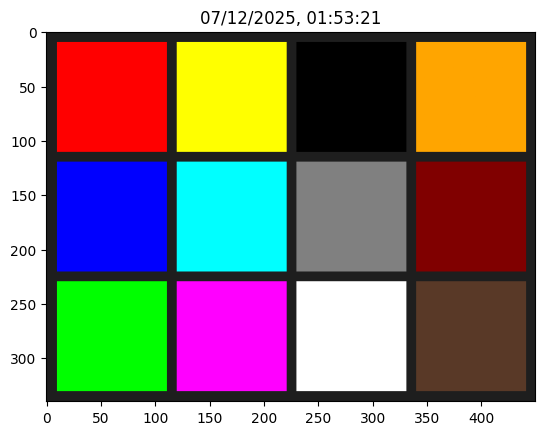

In [68]:
show_using_matplotlib(bgr_image=img,name=None)

#### <span style="font-size: 0.9em;">🟨</span> **BGR2RGB**

In [69]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img[..., ::-1]

cv2.imshow("Original Image", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [70]:
cv2.imshow("Original Image", img[..., ::-1])
cv2.waitKey()
cv2.destroyAllWindows()

#### <span style="font-size: 0.9em;">🟨</span> **BGR2GRAY**

In [71]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Original Image 1", gray)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2.imshow("Original Image 2", gray)

cv2.waitKey()
cv2.destroyAllWindows()

#### <span style="font-size: 0.9em;">🟨</span> **BGR2BGRA**

In [72]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
img.shape

(340, 450, 4)

#### <span style="font-size: 0.9em;">🟨</span> **BGR2CMYK** 

In [73]:
# NOT SUPPORTED DIRECTLY

bgr = cv2.imread("data/color_spaces.png")
bgr = cv2.normalize(bgr, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC3)
cv2.imshow("Original Image", bgr)

# cmyk = cv2.cvtColor(bgr, cv2.COLOR_BGR2C)
# cv2.imshow("Original Image", cmyk)

cv2.waitKey()
cv2.destroyAllWindows()

In [74]:
bgr = cv2.imread("data/color_spaces.png")
bgr = cv2.normalize(bgr, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC3)
cv2.imshow("Original Image", bgr)

cmy = 1 - bgr
cv2.imshow("CMY Image", cmy)

cv2.waitKey()
cv2.destroyAllWindows()

OpenCV does not have a direct function to convert BGR to CMYK because the CMYK color model is primarily used in the printing industry, and it is a subtractive color model, unlike the additive RGB model. OpenCV is primarily designed for computer vision tasks and image processing in digital displays, where RGB and other related color spaces (like HSV, Lab, etc.) are more commonly used.

However, you can convert an RGB image to CMYK using a custom function. Here's a sample code to demonstrate how you can achieve this conversion:

```python
import cv2
import numpy as np

def bgr_to_cmyk(bgr_image):
    # Normalize the BGR values to the range 0-1
    bgr_image = bgr_image.astype(float) / 255.0
    
    # Extract B, G, and R channels
    B = bgr_image[:, :, 0]
    G = bgr_image[:, :, 1]
    R = bgr_image[:, :, 2]
    
    # Calculate K (Black) channel
    K = 1 - np.max(bgr_image, axis=2)
    
    # Avoid division by zero
    C = (1 - R - K) / (1 - K + 1e-10)
    M = (1 - G - K) / (1 - K + 1e-10)
    Y = (1 - B - K) / (1 - K + 1e-10)
    
    # Stack channels to get the CMYK image
    CMYK = (np.dstack((C, M, Y, K)) * 255).astype(np.uint8)
    
    return CMYK

# Load the image
img = cv2.imread('data/color_spaces.png')

# Convert BGR to CMYK
cmyk_image = bgr_to_cmyk(img)

# Display the original and CMYK images
cv2.imshow('Original BGR Image', img)
cv2.imshow('CMYK Image', cmyk_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

##### Explanation:
1. **Normalization**: The BGR values are normalized to the range 0-1.
2. **Extract Channels**: The B, G, and R channels are extracted.
3. **Calculate K (Black) Channel**: K is calculated as \( K = 1 - \max(R, G, B) \).
4. **Calculate C, M, Y Channels**: The C, M, and Y channels are calculated using the formulas:
   \[
   C = \frac{1 - R - K}{1 - K}
   \]
   \[
   M = \frac{1 - G - K}{1 - K}
   \]
   \[
   Y = \frac{1 - B - K}{1 - K}
   \]
5. **Avoid Division by Zero**: A small value (`1e-10`) is added to avoid division by zero.
6. **Stack Channels**: The C, M, Y, and K channels are stacked together to form the CMYK image.
7. **Display Images**: The original BGR and converted CMYK images are displayed.

This custom function allows you to convert a BGR image to the CMYK color model, even though OpenCV does not provide a direct function for this conversion.

In [75]:
def bgr_to_cmyk(bgr_image):
    # Normalize the BGR values to the range 0-1
    bgr_image = bgr_image.astype(float) / 255.0
    
    # Extract B, G, and R channels
    B = bgr_image[:, :, 0]
    G = bgr_image[:, :, 1]
    R = bgr_image[:, :, 2]
    # B, G, R = cv2.split(bgr_image)
    
    # Calculate K (Black) channel
    K = 1 - np.max(bgr_image, axis=2)
    # K = np.min(1-bgr_image, axis=2)
    
    # Avoid division by zero
    C = (1 - R - K) / (1 - K + 1e-10)
    M = (1 - G - K) / (1 - K + 1e-10)
    Y = (1 - B - K) / (1 - K + 1e-10)
    
    # Stack channels to get the CMYK image
    CMYK = (np.dstack((C, M, Y, K)) * 255).astype(np.uint8)
    # cmyk = cv2.merge((C, M, Y, K))
    
    return CMYK

# Load the image
img = cv2.imread('data/color_spaces.png')

# Convert BGR to CMYK
cmyk_image = bgr_to_cmyk(img)
print(cmyk_image.shape)

# Display the original and CMYK images
cv2.imshow('Original BGR Image', img)
cv2.imshow('CMYK Image', cmyk_image)
cv2.waitKey()
cv2.destroyAllWindows()


(340, 450, 4)


#### <span style="font-size: 0.9em;">🟨</span> **BGR2HSV**

In [76]:
bgr = cv2.imread("data/color_spaces.png")
# bgr = cv2.normalize(bgr, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC3)
cv2.imshow("Original Image", bgr)

hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
cv2.imshow("HSV Image", hsv)

cv2.waitKey()
cv2.destroyAllWindows()

In [77]:
h, s, v = cv2.split(hsv)

In [78]:
h.dtype, s.dtype, v.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [79]:
h.min(), h.max(), s.min(), s.max(), v.min(), v.max()

(0, 150, 0, 255, 0, 255)

In [80]:
cv2.imshow("Original Image", bgr)

hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
cv2.imshow("H Image", h/180)
cv2.imshow("S Image", s/255)
cv2.imshow("V Image", v/255)

cv2.waitKey()
cv2.destroyAllWindows()

In [81]:
bgr = cv2.imread("data/color_spaces.png")
bgr = cv2.normalize(
    bgr, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC3
)
cv2.imshow("Original Image", bgr)

hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV_FULL)

h, s, v = cv2.split(hsv)

print(h.min(), h.max(), s.min(), s.max(), v.min(), v.max())

cv2.imshow("Hue", h/360)
cv2.imshow("Saturation", s)
cv2.imshow("Value", v)

cv2.waitKey()
cv2.destroyAllWindows()

0.0 300.0 0.0 0.9999999 0.0 1.0


In [82]:
h.max(), (300/360)*255

(300.0, 212.5)

#### <span style="font-size: 0.9em;">🟨</span> **BGR2LAB**

In [83]:
cv2.COLOR_BGR2LAB, cv2.COLOR_BGR2Lab

(44, 44)

In [100]:
bgr = cv2.imread("data/color_spaces.png")
# bgr = cv2.normalize(bgr, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC3)
cv2.imshow("Original Image", bgr)

lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2Lab)

l, a, b = cv2.split(lab)
print(l.min(), l.max(), a.min(), a.max(), b.min(), b.max())

cv2.imshow("L*", l)
cv2.imshow("a*", a)
cv2.imshow("b*", b)

cv2.waitKey()
cv2.destroyAllWindows()

0 255 42 226 20 223


#### <span style="font-size: 0.9em;">🟨</span> **BGR2YCbCr**

#### <span style="font-size: 0.9em;">🟨</span> **BGR2Luv**

### <span style="font-size: 0.9em;">🟧</span> **Manipulating Channels**

#### <span style="font-size: 0.9em;">🟨</span> **Example 1: Color Inversion**

In [85]:
img = cv2.imread('data/color_spaces.png')
img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC3)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)
h = 360 - h
inverted_hsv = cv2.merge((h, s, v))
bgr = cv2.cvtColor(inverted_hsv, cv2.COLOR_HSV2BGR)

cv2.imshow('Original Image', img)
cv2.imshow('Hue Inverted Image', bgr)
cv2.waitKey()
cv2.destroyAllWindows()

#### <span style="font-size: 0.9em;">🟨</span> **Example 2: Color Shifting in HSV**

In [86]:
img = cv2.imread('data/color_spaces.png')
img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC3)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)
h += 60
print(h.min(), h.max())
inverted_hsv = cv2.merge((h, s, v))
bgr = cv2.cvtColor(inverted_hsv, cv2.COLOR_HSV2BGR)

cv2.imshow('Original Image', img)
cv2.imshow('Hue Inverted Image', bgr)
cv2.waitKey()
cv2.destroyAllWindows()

60.0 360.0


#### <span style="font-size: 0.9em;">🟨</span> **Example 3: Thresholding**

In [87]:
img = cv2.imread('data/color_spaces.png')
# img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC3)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the range for the blue color in HSV
lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])

# Create a binary mask where blue colors are white and the rest are black
# (hsv > lower_blue) & (hsv < upper_blue)
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Apply the mask to the original image

cv2.imshow('Original Image', img)
cv2.imshow('Mask', mask)
# cv2.imshow('Result', result)
cv2.waitKey()
cv2.destroyAllWindows()


## <span style="font-size: 0.9em;">🟥</span> **Section 2: Mini Projects**

In [14]:
from IPython.display import clear_output
import cv2
import numpy as np
import os

### <span style="font-size: 0.9em;">🟧</span> **Keying**

<img src="attachment:45276a48-c469-4c38-9e60-2d32fe57b59d.png" alt="image.png" width="400"/>

In [6]:
img = cv2.imread("data/keying.png")

cv2.imshow("Keying", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV_FULL)
h, s, v = cv2.split(hsv)

In [9]:
def callback_function(event, x, y, flag, param):
    clear_output(wait=True)
    print(h[y, x], s[y, x], v[y, x])

cv2.imshow("Image", img)
cv2.setMouseCallback("Image", callback_function)

cv2.waitKey()
cv2.destroyAllWindows()

20 133 142


In [15]:
lower_green = np.array([85, 80, 120])
upper_green = np.array([105, 255, 255])

mask = ~cv2.inRange(hsv, lower_green, upper_green)

img_alpha = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
img_alpha[..., -1] = mask.copy()

cv2.imshow("Image", img)
cv2.imshow("Mask", mask)
cv2.imshow("Key", img_alpha[..., -1])
cv2.waitKey()
cv2.destroyAllWindows()

os.makedirs("results",exist_ok=True)
cv2.imwrite("results/key.png", img_alpha)

True

In [13]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 300)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 300)

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break
        
    cv2.imshow("Frame", frame)
    
    key = cv2.waitKey(1)
    if key == ord("q"):
        break
    
cv2.destroyAllWindows()
cap.release()

### <span style="font-size: 0.9em;">🟧</span> **Skin Segmentation**

In [16]:
img = cv2.imread("data/keying.png")

cv2.imshow("Keying", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV_FULL)
h, s, v = cv2.split(hsv)

In [18]:
def callback_function(event, x, y, flag, param):
    clear_output(wait=True)
    print(h[y, x], s[y, x], v[y, x])

cv2.imshow("Image", img)
cv2.setMouseCallback("Image", callback_function)

cv2.waitKey()
cv2.destroyAllWindows()

93 130 188


In [22]:
# lower_green = np.array([10, 90, 90])
# lower_green = np.array([10, 70, 70]) 
# lower_green = np.array([0, 70, 70]) 
lower_green = np.array([0, 50, 50]) 
upper_green = np.array([30, 255, 255])

mask = cv2.inRange(hsv, lower_green, upper_green)

skin = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow("Image", img)
cv2.imshow("Mask", mask)
cv2.imshow("Skin", skin)
cv2.waitKey()
cv2.destroyAllWindows()

#### <span style="font-size: 0.9em;">🟨</span> **More about skin segmentation**

[Mastering OpenCV 4 with Python 3](https://github.com/PacktPublishing/Mastering-OpenCV-4-with-Python/blob/master/Chapter05/01-chapter-content/skin_segmentation.py)

### <span style="font-size: 0.9em;">🟪</span> **Ball Tracking**

[Sample Code](https://www.youtube.com/watch?v=aFNDh5k3SjU)

Please Also change color of the ball

#### <span style="font-size: 0.9em;">🟨</span> **Also change color of the ball**

### <span style="font-size: 0.9em;">🟪</span> **Ping Pong**

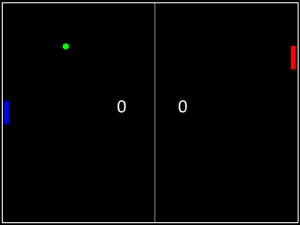

[Sample Code](https://www.geeksforgeeks.org/create-a-pong-game-in-python-pygame/)